In [39]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [3]:
x_tr=idx2numpy.convert_from_file("train-images-mnist")
y_tr=idx2numpy.convert_from_file("train-labels-mnist")
x_te=idx2numpy.convert_from_file("test-images-mnist")
y_te=idx2numpy.convert_from_file("test-labels-mnist")
#converting data into numpy array

5


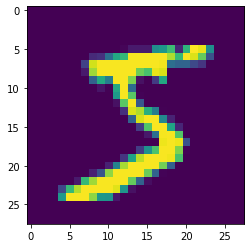

In [11]:
plt.imshow(x_tr[0])
print(y_tr[0])
#displaying only 1 image to check the data

In [14]:
x_tr.shape,x_te.shape

((60000, 28, 28), (10000, 28, 28))

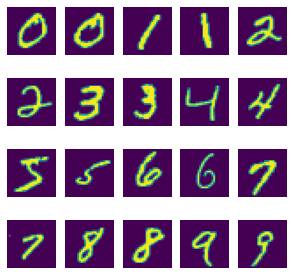

In [31]:
fig = plt.figure(figsize = (5,5))
x = 1
for i in range(10):
    count = 0
    for j in range(len(y_tr)):
        if(count == 2):
            break
        if(i == y_tr[j]):
            fig.add_subplot(4, 5, x)
            x = x + 1
            plt.imshow(x_tr[j])
            plt.axis('off')
            count = count + 1
#plotting 2 images of every class

In [33]:
x_tr1 = x_tr.reshape(60000, 784)
x_te1 = x_te.reshape(10000, 784)
#converting 3D array to 2D 

In [36]:
loReOVR = OneVsRestClassifier(LogisticRegression())
loReOVO = OneVsOneClassifier(LogisticRegression())
loReOVR.fit(x_tr1, y_tr)
loReOVO.fit(x_tr1,y_tr )
#classifying using one vs one and one vs rest classifiers

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

OneVsOneClassifier(estimator=LogisticRegression())

In [49]:
prOVR = loReOVR.predict(x_te1)
prOVO = loReOVO.predict(x_te1)
#predicting labels using using OVR and OVS

In [55]:
sOVR = loReOVR.score(x_te1, y_te)
sOVO = loReOVO.score(x_te1, y_te)
print(sOVR)
print(sOVO)
#checking scores in both classification techniques

0.9178
0.9276


In [92]:
cmOVR = sm.confusion_matrix(y_te, prOVR)
accOVR = cmOVR.diagonal()/cmOVR.sum(axis=0)
for i in range(0, len(accOVR)):
    print("class-" + str(i) + " accuracy  -- " + str(accOVR[i]*100) )
print("\nAccuracy of classes in Percentage.\nWhile using One vs Rest Classifier\n\nOverall Accuracy")
print(accOVR.sum()/len(accOVR))
#finding class wise accuracy of OVR classifier using confusion matrix

class-0 accuracy  -- 94.94047619047619
class-1 accuracy  -- 96.12403100775194
class-2 accuracy  -- 93.10699588477365
class-3 accuracy  -- 90.05905511811024
class-4 accuracy  -- 92.5737538148525
class-5 accuracy  -- 90.51008303677342
class-6 accuracy  -- 93.71134020618557
class-7 accuracy  -- 92.92035398230088
class-8 accuracy  -- 83.47996089931574
class-9 accuracy  -- 89.77159880834161

Accuracy of classes in Percentage.
While using One vs Rest Classifier

Overall Accuracy
0.9171976489488817


In [90]:
cmOVO = sm.confusion_matrix(y_te, prOVO)
# accOVO=[]
# for i in range (len(cmOVO)):
#     s=0
#     for j in range (cmOVO.shape[1]):
#         s=s+cmOVO[j][i] 
#     x=(cmOVO.diagonal().sum())/(cmOVO.diagonal().sum()+cmOVO[i].sum(axis=0)+s-cmOVO[i][i]*2)
#     accOVO.append(x)
accOVO = cmOVO.diagonal()/(cmOVO.sum(axis=0))
for i in range(len(accOVO)):
    print("class-" + str(i) + " accuracy  -- " + str(accOVO[i]*100) )
# acc=0
# for i in range (len(accOVO)):
#     acc=acc+accOVO[i]
#     print(accOVO[i])
# acc=acc/len(accOVO)
print("\nAccuracy of classes in Percentage.\nWhile using One vs One Classifier\n\nOverall Accuracy")
print(accOVO.sum()/len(accOVO))

#finding class wise accuracy of OVO classifier using confusion matrix

class-0 accuracy  -- 96.15773508594539
class-1 accuracy  -- 97.28070175438597
class-2 accuracy  -- 92.08984375
class-3 accuracy  -- 90.37900874635568
class-4 accuracy  -- 92.78656126482213
class-5 accuracy  -- 89.14549653579677
class-6 accuracy  -- 95.34391534391534
class-7 accuracy  -- 94.25173439048564
class-8 accuracy  -- 86.37709772951628
class-9 accuracy  -- 93.01130524152107

Accuracy of classes in Percentage.
While using One vs One Classifier

Overall Accuracy
0.9268233998427442
